<a href="https://colab.research.google.com/github/sheikmohdimran/Experiments_2020/blob/master/Vision/FastAI2_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#https://zenodo.org/record/2579118
!unzip -q TNBC_dataset.zip

In [2]:
!pip install -q fastai2

     |████████████████████████████████| 184kB 9.3MB/s 


### Check Mask values

In [5]:
from PIL import Image
import numpy as np

def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

a=load_image('TNBC_dataset/masks/01_3.png')
np.unique(a)

array([0, 1], dtype=int32)

### Function to change 255 to 1 in masks

In [0]:
def change_image( infilename ) :
    img = np.array(Image.open(infilename))
    img[img==255] = 1
    im = Image.fromarray(img)
    im.save(infilename)

In [0]:
from fastai2.vision.all import *
from pathlib import Path

In [0]:
path = Path('./TNBC_dataset/')
fnames = get_image_files(path/"images")

### Change 255 to 1 in Masks

In [9]:
list(map(change_image, (path/"masks").glob('**/*.png')))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [0]:
def label_func(fn): return path/"masks"/f"{fn.stem}{fn.suffix}"

### Comment 'codes' to make the markings visible

In [0]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=2, fnames = fnames, label_func = label_func, #codes = codes
)

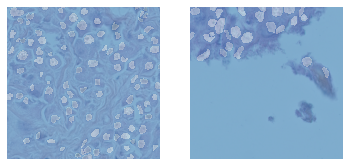

In [12]:
dls.show_batch(max_n=4)

In [0]:
learn = unet_learner(dls, xresnet50, n_out=2)

In [14]:
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,0.869272,0.305842,00:47


epoch,train_loss,valid_loss,time
0,0.230049,0.259618,00:34
1,0.197928,0.234885,00:32
2,0.189463,0.255530,00:32
3,0.178099,0.206716,00:32
4,0.163759,0.197779,00:32
5,0.158790,0.188297,00:32
6,0.145680,0.203694,00:32
7,0.137977,0.192882,00:32


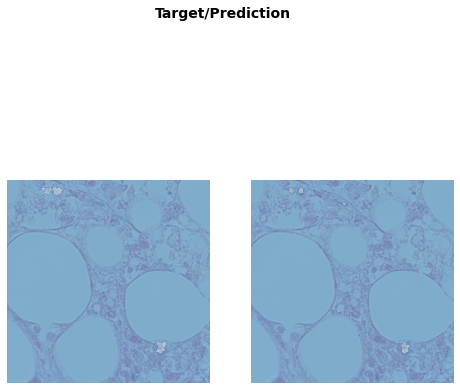

In [15]:
learn.show_results(max_n=12, figsize=(8,8))

### Export and Inference

In [0]:
learn.export()

In [5]:
path = Path('/content/TNBC_dataset/')
path.ls(file_exts='.pkl')

(#1) [Path('/content/TNBC_dataset/export.pkl')]

In [0]:
learn_inf = load_learner(path/'export.pkl')

In [7]:
output_mask = learn_inf.predict('TCGA-18-5592-01Z-00-DX1.png')

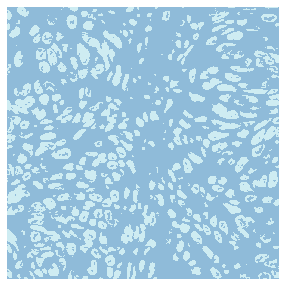

In [9]:
test_eq(type(output_mask[0]), TensorMask)
output_mask[0].show(figsize=(5,5))

In [10]:
import numpy
import torch
numpy.unique(output_mask[0].numpy())

array([0, 1])

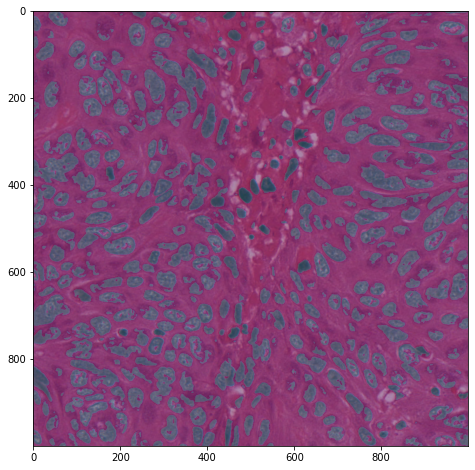

In [42]:
plt.rcParams["figure.figsize"] = (8,8)
im=Image.open('TCGA-18-5592-01Z-00-DX1.png')
plt.imshow(im)
plt.imshow(output_mask[0],vmax=2,vmin=0,alpha=0.4)